<a href="https://colab.research.google.com/github/Yogeswari-Sahu/Ques-Ans-NLP/blob/main/Q/A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import string

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag

from sklearn.metrics.pairwise import cosine_similarity

In [62]:
z=pd.read_csv("z.csv");
y=pd.read_csv("y.csv");
x=pd.read_csv("x.csv");
w=pd.read_csv("w.csv");
u=pd.read_csv("u.csv");
v=pd.read_csv("v.csv");
a=pd.read_csv("a.csv");
b=pd.read_csv("b.csv");
c=pd.read_csv("c.csv");
d=pd.read_csv("d.csv");
e=pd.read_csv("e.csv");
f=pd.read_csv("f.csv");
g=pd.read_csv("g.csv");
h=pd.read_csv("h.csv");
i=pd.read_csv("i.csv");
j=pd.read_csv("j.csv");
k=pd.read_csv("k.csv");
l=pd.read_csv("l.csv");
m=pd.read_csv("m.csv");
n=pd.read_csv("n.csv");
o=pd.read_csv("o.csv");
p=pd.read_csv("p.csv");
q=pd.read_csv("q.csv");
r=pd.read_csv("r.csv");
s=pd.read_csv("s.csv");
t=pd.read_csv("t.csv");
all_df=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z]
df=pd.concat(all_df)

df.columns=["Questions","Answer"];

df.head(10)

,Questions,Answer
0,What is hemophilia?,'Hemophilia is not one disease but rather one ...
1,What causes hemophilia?,"'As mentioned above, hemophilia is caused by a..."
2,What are the signs and symptoms of hemophilia?,"'Hemophilia can vary in its severity, dependin..."
3,How is hemophilia diagnosed?,'The majority of patients with hemophilia have...
4,Is it possible to know if you are a carrier of...,'Since men with the genetic mutation will have...
5,What are treatments for hemophilia?,'The mainstay of treatment is replacement of t...
6,Inhibitors,'A major complication of treatment is the deve...
7,Infections,"'Blood-borne infections, such as the ''HIV'' v..."
8,Can hemophilia be prevented?,'Hemophilia is a genetic (inherited) disease a...
9,What is the outlook (prognosis) for hemophilia?,"'Before factor concentrates were developed, th..."


In [63]:
df.shape

(38529, 2)

In [64]:
df = df.drop_duplicates(subset='Questions')

In [66]:
df = df.dropna()

In [67]:
df.shape

(21763, 2)

In [68]:
df.to_csv("final.csv", index=False)

In [69]:
df1=pd.read_csv("final.csv")
df1.shape

(21763, 2)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from textblob import TextBlob
from wordcloud import WordCloud
import sklearn

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e', 'text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


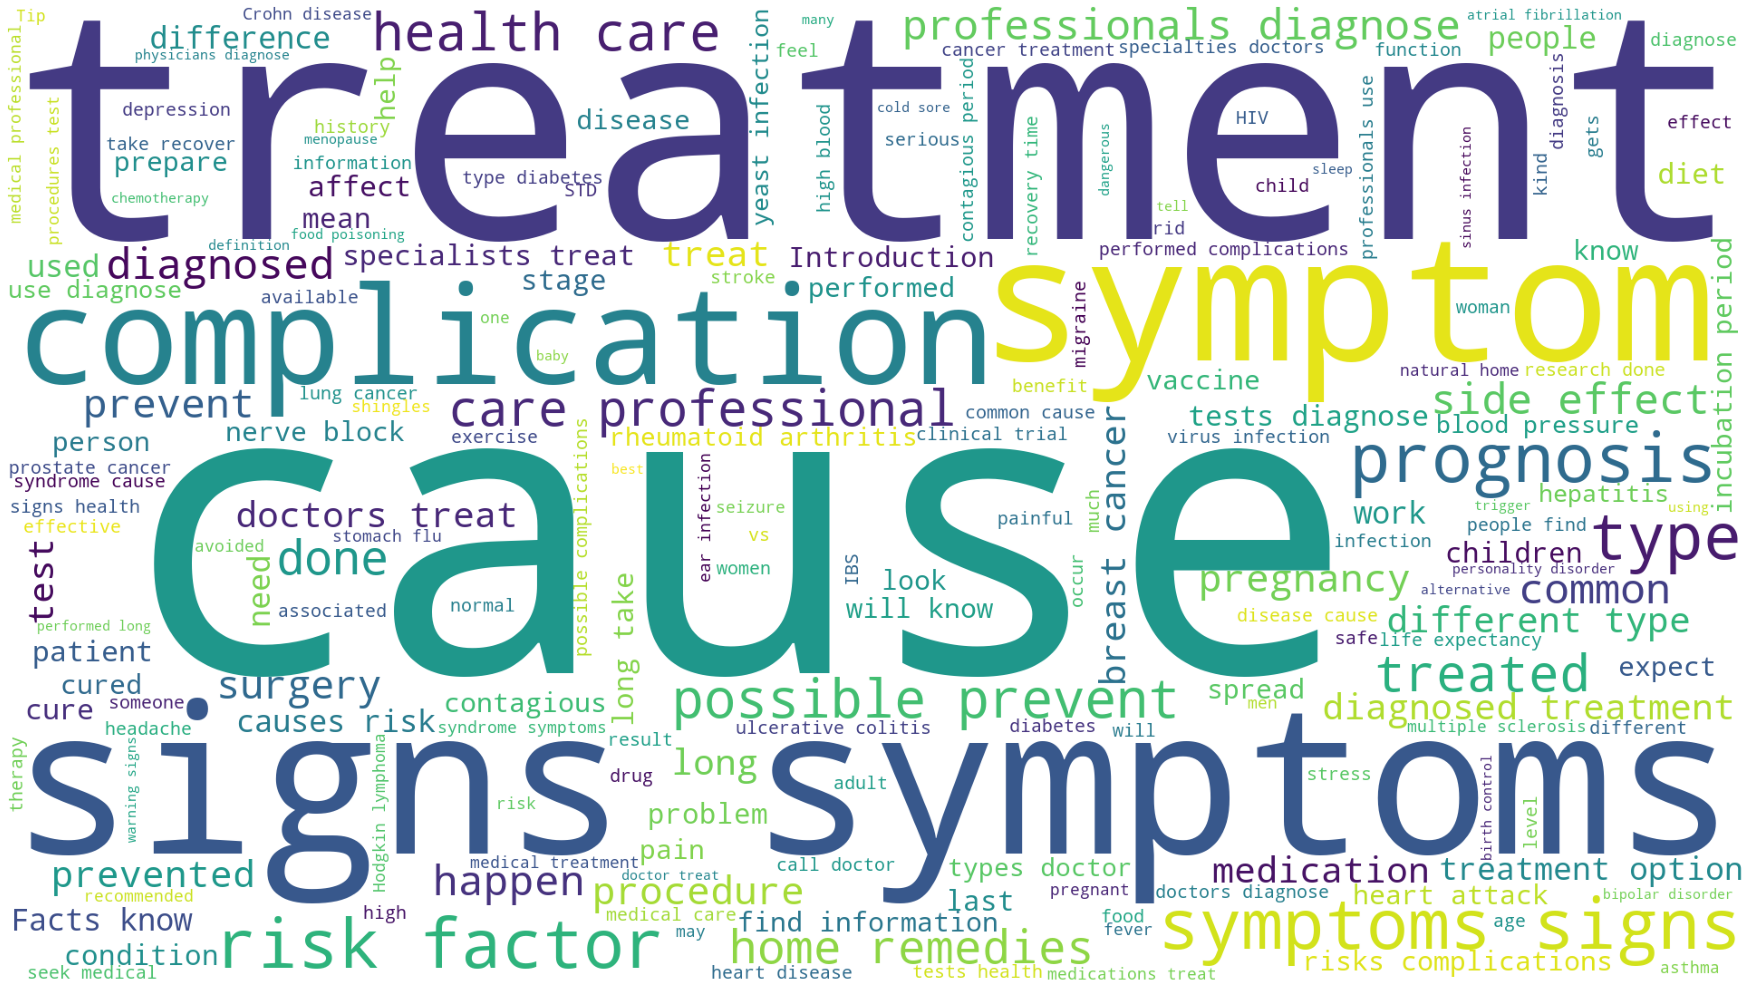

In [71]:
text = ' '.join(df.Questions)
cloud = WordCloud(background_color='white', width=1920, height=1080).generate(text)
plt.figure(figsize=(32, 18))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('questions_wordcloud.png')

In [72]:
import re
import gensim 
from gensim.parsing.preprocessing import remove_stopwords
def clean_sentence(sentence, stopwords=False):   
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)
    
    if stopwords:
         sentence = remove_stopwords(sentence)
    return sentence

def get_cleaned_sentences(df,stopwords=False):    
    sents=df[["Questions"]];
    cleaned_sentences=[]

    for index,row in df.iterrows():
        cleaned=clean_sentence(row["Questions"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

cleaned_sentences_without_stopwords = get_cleaned_sentences(df,stopwords=True)
cleaned_sentences_with_stopwords=get_cleaned_sentences(df,stopwords=False)

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
def my_tokenizer(doc):
    words = word_tokenize(doc)    
    pos_tags = pos_tag(words)
    non_stopwords = [w for w in pos_tags if not w[0].lower() in stopwords_list]
    non_punctuation = [w for w in non_stopwords if not w[0] in string.punctuation]
    lemmas = []
    for w in non_punctuation:
        if w[1].startswith('J'):
            pos = wordnet.ADJ
        elif w[1].startswith('V'):
            pos = wordnet.VERB
        elif w[1].startswith('N'):
            pos = wordnet.NOUN
        elif w[1].startswith('R'):
             pos = wordnet.ADV
        else:
            pos = wordnet.NOUN
        lemmas.append(lemmatizer.lemmatize(w[0], pos))
    return lemmas

In [74]:
def getWordVec(word,model):
        samp=model['computer'];
        vec=[0]*len(samp);
        try:
                vec=model[word];
        except:
                vec=[0]*len(samp);
        return (vec)

def getPhraseEmbedding(phrase,embeddingmodel):                    
        samp=getWordVec('computer', embeddingmodel);
        vec=np.array([0]*len(samp));
        den=0;
        for word in phrase.split():
            den=den+1;
            vec=vec+np.array(getWordVec(word,embeddingmodel));
        return vec.reshape(1, -1)

In [75]:
from gensim import corpora
import pprint

sentence_words = [[word for word in document.split() ]
         for document in cleaned_sentences_with_stopwords]
dictionary = corpora.Dictionary(sentence_words)
bow_corpus = [dictionary.doc2bow(text) for text in sentence_words]

In [76]:
def ask_question_bow(question):
    question=clean_sentence(question,stopwords=False);
    question_embedding = dictionary.doc2bow(question.split())
    
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(bow_corpus):
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        if sim>max_sim:
            max_sim=sim;
            index_sim=index;
    print("*****BAG OF WORDS MODEL*****\n")
    print('Your question:\t\t', question)
    print('Closest question found:\t', df['Questions'].iloc[index_sim])
    print("\n")
    print('Cosine Similarity: {:.2%}'.format(max_sim))
    print("\n")
    print('Answer:', df.iloc[index_sim]['Answer'])

In [77]:
ask_question_bow('When did Zika virus start?')

*****BAG OF WORDS MODEL*****

Your question:		 when did zika virus start
Closest question found:	 When will someone no longer get hives?


Cosine Similarity: 100.00%


Answer: 'Hives are not contagious but result from an agent that is not normally in the body that triggers an allergic response. Individuals who become desensitized to substances that used to trigger hives will no longer get them. This may occur as the patient gets older or by desensitization procedures by a specialty physician (immunologist or dermatologist). Alternatively, individuals who know their triggers will no longer get hives if they avoid them (for example, avoiding foods or medicines that are known to cause hives in a particular individual).' 


# New section

In [44]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf_matrix = tfidf_vectorizer.fit_transform(tuple(df['Questions']))

In [79]:
def ask_question_tfidf(question):
    query_vect = tfidf_vectorizer.transform([question])
    similarity = cosine_similarity(query_vect, tfidf_matrix)
    max_similarity = np.argmax(similarity, axis=None)
    
    print("*****TF-IDF MODEL*****\n")
    print('Your question:\t\t', question)
    print('Closest question found:\t', df.iloc[max_similarity]['Questions'])
    print("\n")
    print('Cosine Similarity: {:.2%}'.format(similarity[0, max_similarity]))
    print("\n")
    print('Answer:', df.iloc[max_similarity]['Answer'])

In [80]:
ask_question_tfidf('When did Zika virus start?')

*****TF-IDF MODEL*****

Your question:		 When did Zika virus start?
Closest question found:	 What is Zika virus?


Cosine Similarity: 79.53%


Answer: 'Zika virus (sometimes termed ''Zika fever'') is a ''Flavivirus'' that is related to dengue, ''West Nile'', ''yellow fever'', and Japanese encephalitis viruses (''Flaviviridae''); the viruses are transmitted to humans by mosquito bites and produce a disease that lasts a few days to a week. Common symptoms include ''fever'', ''rash'', joint ''pain'', and ''conjunctivitis'' (redness of the eyes). In Brazil, the viral infection has been linked to ''birth defects'' (mainly small head and small brain size, termed microcephaly) in ''babies'' (newborns) whose mothers became infected with Zika virus during their pregnancy. The CDC reported that researchers now conclude from new data published in the ''New England Journal of Medicine'' in April 2016, that Zika virus is responsible for (causes) microcephaly and other serious brain defects. Accordi

In [49]:
 pip install bert-for-tf2

     |████████████████████████████████| 51kB 4.7MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.7-cp36-none-any.whl size=30539 sha256=0e6e46b815cc20b7bde16ecb4c12198db34e547fbffa30291fd161642c1200a8
  Stored in directory: /root/.cache/pip/wheels/e1/f8/e2/b98f79a6b8cc898d8e4102b83acb8a098df7d27500a2bac912
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7304 sha256=8cba7a4e87f9452696698be635754805e05e0b3edafb05bc4464d5bb93c73ba8
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19475 sha256=8af864df0553edc5f62fbc62859b596b8391ab8e0218c63ac4d18247de6b27a3
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [83]:
pip install bert_serving

In [81]:
pip install bert-tensorflow

     |████████████████████████████████| 71kB 5.9MB/s 


In [85]:
pip install bert_serving.client

In [86]:
from bert_serving.client import BertClient
bc = BertClient(check_length=False)
res=bc.encode(['ML', 'AI'])


KeyboardInterrupt



In [88]:
def ask_question_bert(question):
    question = clean_sentence(question,stopwords=False);

    sent_bertphrase_embeddings=[];
    for sent in cleaned_sentences_with_stopwords:
        sent_bertphrase_embeddings.append(bc.encode([sent]));

    question_embedding=bc.encode([question]);
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sent_bertphrase_embeddings):
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        if sim>max_sim:
            max_sim=sim;
            index_sim=index;
            
    print("*****BERT MODEL*****\n")
    print('Your question:\t\t', question)
    print('Closest question found:\t', df['Questions'].iloc[index_sim])
    print("\n")
    print('Cosine Similarity: {:.2%}'.format(max_sim))
    print("\n")
    print('Answer:', df.iloc[index_sim]['Answer'])

In [89]:
ask_question_bert('When did Zika virus start?')

NameError: ignored

In [ ]:
import gensim.downloader as api

v2w_model=None;
try:
    v2w_model = gensim.models.KeyedVectors.load("./w2vecmodel.mod")
    print("Loaded w2v model")
except:            
    v2w_model = api.load('word2vec-google-news-300')
    v2w_model.save("./w2vecmodel.mod")
    print("Saved glove model")

w2vec_embedding_size=len(v2w_model['computer']);

[===========================-----------------------] 54.2% 901.4/1662.8MB downloaded

In [1]:
from gensim.models import Word2Vec 
import gensim.downloader as api
glove_model=None;
try:
    glove_model = gensim.models.KeyedVectors.load("./glovemodel.mod")
    print("Loaded glove model")
except:            
    glove_model = api.load('glove-twitter-25')
    glove_model.save("./glovemodel.mod")
    print("Saved glove model")   
glove_embedding_size=len(glove_model['computer']);

KeyboardInterrupt: ignored

In [ ]:
def ask_question_glove(question):
    sent_embeddings=[];
    for sent in cleaned_sentences_with_stopwords:
        sent_embeddings.append(getPhraseEmbedding(sent,glove_model));
    question_embedding=getPhraseEmbedding(question,glove_model);
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sent_embeddings):
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        if sim>max_sim:
            max_sim=sim;
            index_sim=index;
            
    print("*****GLOVE MODEL*****\n")
    print('Your question:\t\t', question)
    print('Closest question found:\t', df['Questions'].iloc[index_sim])
    print("\n")
    print('Cosine Similarity: {:.2%}'.format(max_sim))
    print("\n")
    print('Answer:', df.iloc[index_sim]['Answer'])